In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Maternal Health Risk Data Set.csv")

In [ ]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


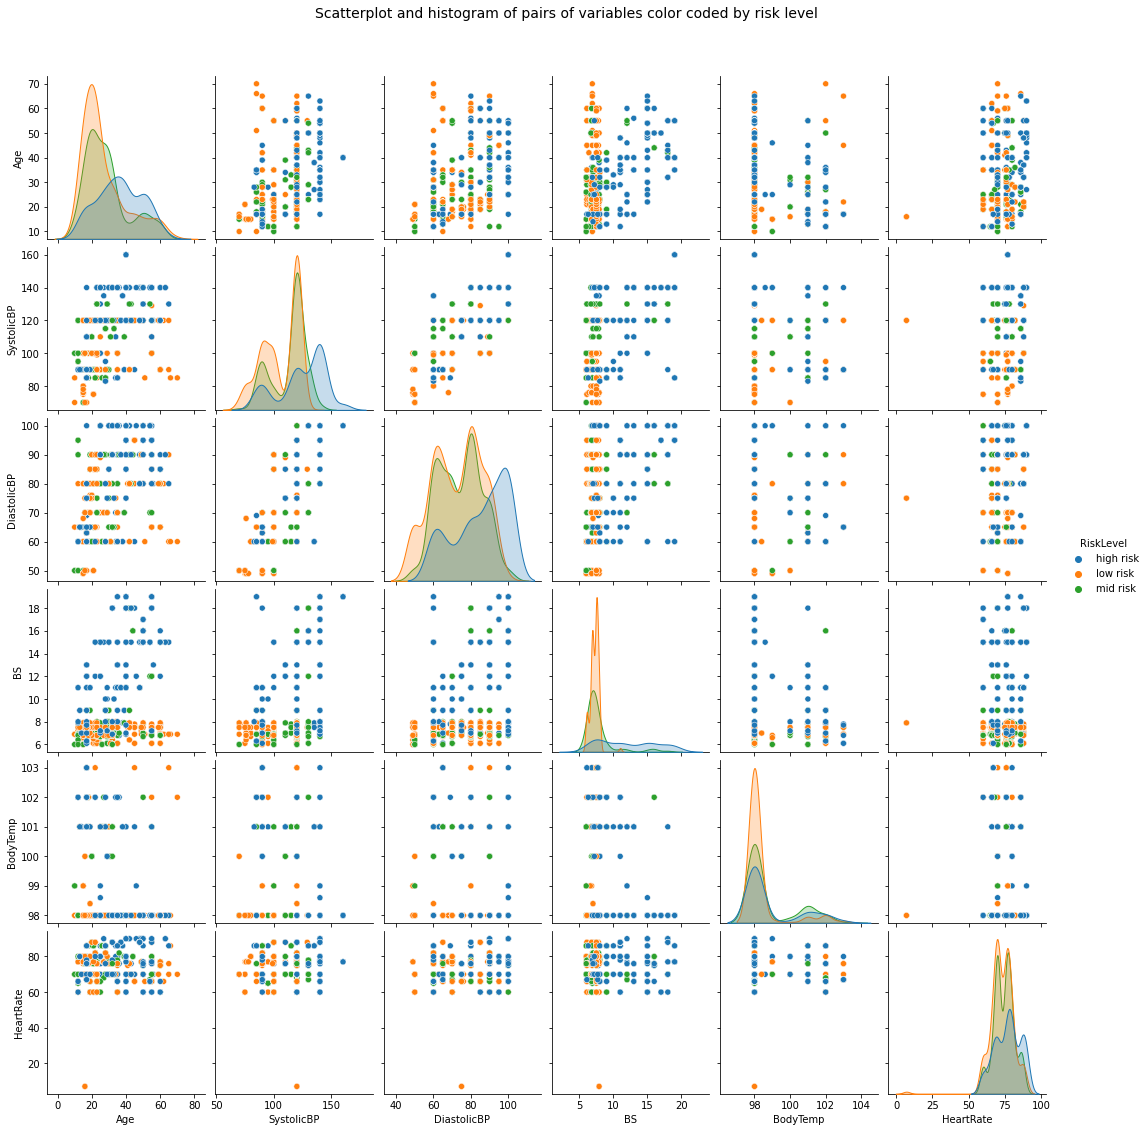

In [ ]:
sns.pairplot(new_dataset,height = 3 ,diag_kind = "kde",corner = True)

In [ ]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)

In [ ]:
y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=SEED)

In [ ]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


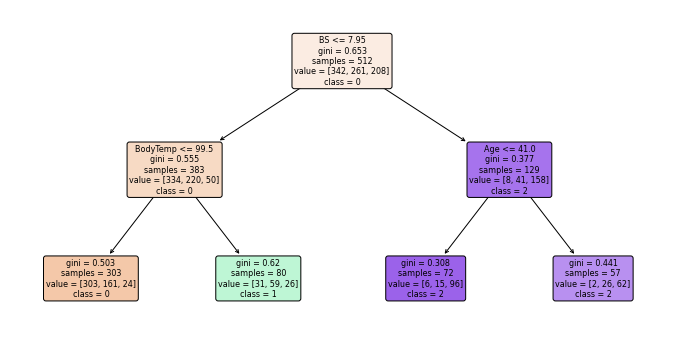

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


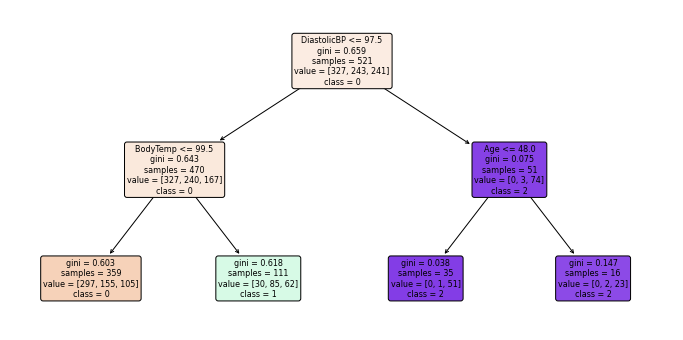

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


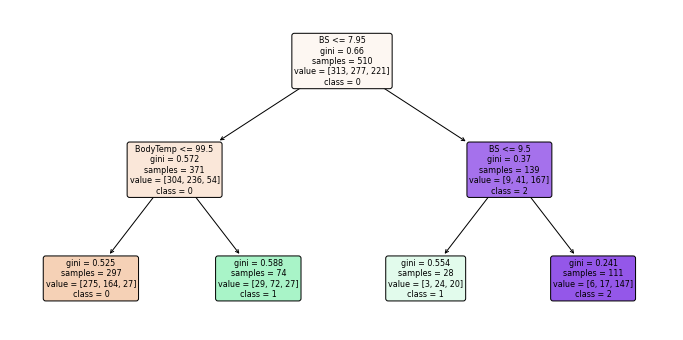

In [ ]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



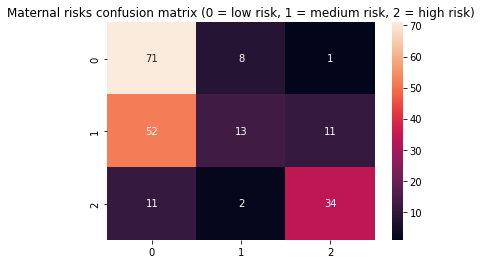

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

AttributeError: ignored

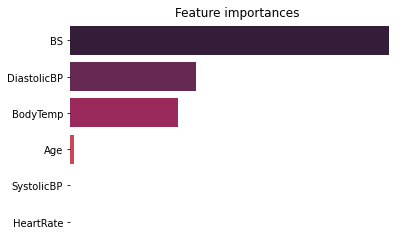

In [ ]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [ ]:
rfc_ = RandomForestClassifier(n_estimators=900,
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.75      0.58      0.65        76
           2       0.90      0.81      0.85        47

    accuracy                           0.74       203
   macro avg       0.78      0.75      0.75       203
weighted avg       0.76      0.74      0.74       203



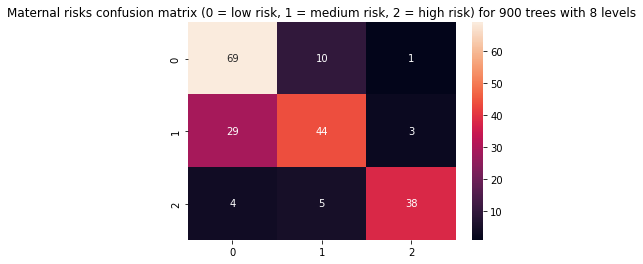

In [ ]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))